In [ ]:
print("Hello World")

Hello World


In [ ]:
!pip install pandas numpy matplotlib seaborn


In [ ]:
!pip install yfinance


In [3]:
import yfinance as yf
import pandas as pd

# Specify the stock/commodity symbol (e.g., "BZ=F" for Brent Crude Oil)
symbol = "BZ=F"

# Download historical data for a specific period
data = yf.download(symbol, start="2020-01-01", end="2023-01-01", interval="1d")

# Keep only the 'Date' and 'Close' columns
data = data[["Close"]].reset_index()

# Display data
print(data.head())

# Save to CSV
data.to_csv("crude_oil_prices.csv", index=False)

# Read the saved CSV to verify
crude_oil_prices = pd.read_csv('crude_oil_prices.csv')

# Display the first few rows of the saved data
print(crude_oil_prices.head())


[*********************100%***********************]  1 of 1 completed

Price        Date      Close
Ticker                  BZ=F
0      2020-01-02  66.250000
1      2020-01-03  68.599998
2      2020-01-06  68.910004
3      2020-01-07  68.269997
4      2020-01-08  65.440002
         Date              Close
0         NaN               BZ=F
1  2020-01-02              66.25
2  2020-01-03   68.5999984741211
3  2020-01-06  68.91000366210938
4  2020-01-07   68.2699966430664


In [4]:
crude_oil_data = pd.read_csv('crude_oil_prices.csv')
crude_oil_data.head()

,Date,Close
0,NaN,BZ=F
1,2020-01-02,66.25
2,2020-01-03,68.5999984741211
3,2020-01-06,68.91000366210938
4,2020-01-07,68.2699966430664


In [23]:
import yfinance as yf
import pandas as pd

# Define the stock symbols with their names
symbols = [
    ("ExxonMobil Corporation", "XOM"),                # ExxonMobil Corporation (XOM)
    ("Chevron Corporation", "CVX"),                   # Chevron Corporation (CVX)
    ("ConocoPhillips", "COP"),                        # ConocoPhillips (COP)
    ("Occidental Petroleum Corporation", "OXY"),      # Occidental Petroleum Corporation (OXY)
    ("BP p.l.c.", "BP"),                              # BP p.l.c. (BP)
    ("Royal Dutch Shell", "SHEL"),                    # Royal Dutch Shell (SHEL)
    ("United States Oil Fund", "USO"),                # United States Oil Fund (USO)
    ("Energy Select Sector SPDR Fund", "XLE"),        # Energy Select Sector SPDR Fund (XLE)
    ("ProShares Ultra Bloomberg Crude Oil", "UCO"),   # ProShares Ultra Bloomberg Crude Oil (UCO)
    ("Natural Gas (Henry Hub)", "NG=F"),              # Natural Gas (Henry Hub) (NG=F)
    ("Brent Crude", "BZ=F"),                          # Brent Crude (BZ=F)
    ("Gold", "GC=F"),                                # Gold (GC=F)
    ("Silver", "SI=F")                               # Silver (SI=F)
]

# Create an empty DataFrame to store all the data
all_data = pd.DataFrame()

# Loop through the symbols and fetch the data
for name, symbol in symbols:
    # Download historical data for each symbol
    data = yf.download(symbol, start="2015-01-01", end="2025-01-01", interval="1d")

    # Keep only the 'Date' and 'Close' columns and reset index
    data = data[["Close"]].reset_index()

    # Rename columns to use the full company name (no short names)
    data.rename(columns={"Close": f"{name}_Close"}, inplace=True)

    # Merge the data with the all_data DataFrame
    if all_data.empty:
        all_data = data
    else:
        all_data = pd.merge(all_data, data, on="Date", how="outer")

# Download Brent Crude Oil price (BZ=F) to add it as the last column
brent_crude_data = yf.download("BZ=F", start="2015-01-01", end="2025-01-01", interval="1d")
brent_crude_data = brent_crude_data[["Close"]].reset_index()
brent_crude_data.rename(columns={"Close": "Brent_Crude_Price"}, inplace=True)

# Merge Brent Crude price data with the all_data DataFrame
all_data = pd.merge(all_data, brent_crude_data[["Date", "Brent_Crude_Price"]], on="Date", how="outer")

# Add tomorrow's price for only Brent Crude (shift by 1 row)
all_data['Brent_Crude_Tomorrow_Price'] = all_data['Brent_Crude_Price'].shift(-1)

# Save the combined data to a CSV file
all_data.to_csv("combined_stock_and_commodity_data_with_oil_price_and_tomorrow.csv", index=False)

# Display the first few rows of the combined data
print(all_data.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-23-42416271fd4c>:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  all_data = pd.merge(all_data, data, on="Date", how="outer")
[*********************100%***********************]  1 of 1 completed
<ipython-input-23-42416271fd4c>:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  all_data = pd.merge(all_data, data, on="Date", how="outer")
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-23-42416271fd4c>:39: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  all_data = pd.merge(all_data, data, on="Date", how="outer")
[*********************100%*****

Price        Date ExxonMobil Corporation_Close Chevron Corporation_Close  \
Ticker                                     XOM                       CVX   
0      2015-01-02                    60.042553                 73.464256   
1      2015-01-05                    58.399654                 70.527756   
2      2015-01-06                    58.089184                 70.495155   
3      2015-01-07                    58.677792                 70.436401   
4      2015-01-08                    59.654449                 72.048203   

Price  ConocoPhillips_Close Occidental Petroleum Corporation_Close  \
Ticker                  COP                                    OXY   
0                 49.960659                              59.187038   
1                 47.582973                              56.992779   
2                 45.618462                              56.508404   
3                 45.922928                              56.515755   
4                 47.068272                    

In [42]:
all_data.tail()

Price,Date,ExxonMobil Corporation_Close,Chevron Corporation_Close,ConocoPhillips_Close,Occidental Petroleum Corporation_Close,BP p.l.c._Close,Royal Dutch Shell_Close,United States Oil Fund_Close,Energy Select Sector SPDR Fund_Close,ProShares Ultra Bloomberg Crude Oil_Close,Natural Gas (Henry Hub)_Close,Brent Crude_Close,Gold_Close,Silver_Close,Brent_Crude_Price,Brent_Crude_Tomorrow_Price
Ticker,,XOM,CVX,COP,OXY,BP,SHEL,USO,XLE,UCO,NG=F,BZ=F,GC=F,SI=F,BZ=F,
2511,2024-12-24,106.400002,143.839996,97.110001,48.119999,28.790001,61.439999,73.650002,84.639999,26.320000,3.946,73.580002,2620.000000,29.974001,73.580002,73.260002
2512,2024-12-26,106.489998,143.979996,96.889999,48.200001,28.850000,61.360001,73.129997,84.570000,26.090000,3.715,73.260002,2638.800049,30.047001,73.260002,74.169998
2513,2024-12-27,106.480003,144.000000,96.919998,48.560001,28.959999,61.689999,73.849998,84.559998,26.430000,3.514,74.169998,2617.199951,29.655001,74.169998,74.389999
2514,2024-12-30,105.760002,143.070007,97.089996,48.459999,29.090000,61.779999,74.820000,84.550003,27.059999,3.936,74.389999,2606.100098,29.106001,74.389999,74.639999
2515,2024-12-31,107.570000,144.839996,99.169998,49.410000,29.559999,62.650002,75.550003,85.660004,27.500000,3.633,74.639999,2629.199951,28.940001,74.639999,NaN


In [51]:
all_data.dropna()
all_data.describe()
all_data.isnull().mean()

,,0
Price,Ticker,
Date,,0.000000
ExxonMobil Corporation_Close,XOM,0.000397
Chevron Corporation_Close,CVX,0.000397
ConocoPhillips_Close,COP,0.000397
Occidental Petroleum Corporation_Close,OXY,0.000397
BP p.l.c._Close,BP,0.000397
Royal Dutch Shell_Close,SHEL,0.000397
United States Oil Fund_Close,USO,0.000397
Energy Select Sector SPDR Fund_Close,XLE,0.000397


In [57]:
df = pd.read_csv('combined_stock_and_commodity_data_with_oil_price_and_tomorrow.csv')
df.head()

,Date,ExxonMobil Corporation_Close,Chevron Corporation_Close,ConocoPhillips_Close,Occidental Petroleum Corporation_Close,BP p.l.c._Close,Royal Dutch Shell_Close,United States Oil Fund_Close,Energy Select Sector SPDR Fund_Close,ProShares Ultra Bloomberg Crude Oil_Close,Natural Gas (Henry Hub)_Close,Brent Crude_Close,Gold_Close,Silver_Close,Brent_Crude_Price,Brent_Crude_Tomorrow_Price
0,NaN,XOM,CVX,COP,OXY,BP,SHEL,USO,XLE,UCO,NG=F,BZ=F,GC=F,SI=F,BZ=F,NaN
1,2015-01-02,60.04255294799805,73.4642562866211,49.96065902709961,59.18703842163086,21.150962829589844,39.80998992919922,159.1199951171875,53.14784240722656,619.375,3.003000020980835,56.41999816894531,1186.0,15.734000205993652,56.41999816894531,53.110001
2,2015-01-05,58.399654388427734,70.52775573730469,47.58297348022461,56.99277877807617,20.030160903930664,37.919918060302734,150.32000732421875,50.94923400878906,557.5,2.881999969482422,53.11000061035156,1203.9000244140625,16.179000854492188,53.11000061035156,51.099998
3,2015-01-06,58.08918380737305,70.49515533447266,45.61846160888672,56.50840377807617,19.880352020263672,37.456329345703125,144.39999389648438,50.200775146484375,510.0,2.937999963760376,51.099998474121094,1219.300048828125,16.60300064086914,51.099998474121094,51.150002
4,2015-01-07,58.677791595458984,70.4364013671875,45.92292785644531,56.51575469970703,19.93028450012207,37.89020919799805,146.9600067138672,50.30767822265625,524.375,2.871000051498413,51.150001525878906,1210.5999755859375,16.510000228881836,51.150001525878906,50.959999


In [59]:
# Remove the first row (index 0)
df.drop(index=0, inplace=True)

# Reset the index to avoid issues after dropping the first row
df.reset_index(drop=True, inplace=True)

df.head()

,Date,ExxonMobil Corporation_Close,Chevron Corporation_Close,ConocoPhillips_Close,Occidental Petroleum Corporation_Close,BP p.l.c._Close,Royal Dutch Shell_Close,United States Oil Fund_Close,Energy Select Sector SPDR Fund_Close,ProShares Ultra Bloomberg Crude Oil_Close,Natural Gas (Henry Hub)_Close,Brent Crude_Close,Gold_Close,Silver_Close,Brent_Crude_Price,Brent_Crude_Tomorrow_Price
0,2015-01-05,58.399654388427734,70.52775573730469,47.58297348022461,56.99277877807617,20.030160903930664,37.919918060302734,150.32000732421875,50.94923400878906,557.5,2.881999969482422,53.11000061035156,1203.9000244140625,16.179000854492188,53.11000061035156,51.099998
1,2015-01-06,58.08918380737305,70.49515533447266,45.61846160888672,56.50840377807617,19.880352020263672,37.456329345703125,144.39999389648438,50.200775146484375,510.0,2.937999963760376,51.099998474121094,1219.300048828125,16.60300064086914,51.099998474121094,51.150002
2,2015-01-07,58.677791595458984,70.4364013671875,45.92292785644531,56.51575469970703,19.93028450012207,37.89020919799805,146.9600067138672,50.30767822265625,524.375,2.871000051498413,51.150001525878906,1210.5999755859375,16.510000228881836,51.150001525878906,50.959999
3,2015-01-08,59.654449462890625,72.04820251464844,47.06827163696289,57.0147819519043,20.379711151123047,38.65693283081055,148.39999389648438,51.437076568603516,536.875,2.927000045776367,50.959999084472656,1208.4000244140625,16.35099983215332,50.959999084472656,50.110001
4,2015-01-09,59.570369720458984,70.61258697509766,47.0610237121582,56.90468978881836,20.296489715576172,38.16957473754883,146.24000549316406,51.0294303894043,522.5,2.946000099182129,50.11000061035156,1216.0,16.38599967956543,50.11000061035156,47.430000


In [60]:
df.isnull()

,Date,ExxonMobil Corporation_Close,Chevron Corporation_Close,ConocoPhillips_Close,Occidental Petroleum Corporation_Close,BP p.l.c._Close,Royal Dutch Shell_Close,United States Oil Fund_Close,Energy Select Sector SPDR Fund_Close,ProShares Ultra Bloomberg Crude Oil_Close,Natural Gas (Henry Hub)_Close,Brent Crude_Close,Gold_Close,Silver_Close,Brent_Crude_Price,Brent_Crude_Tomorrow_Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2512,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2513,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2514,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
df.isnull().mean()

,0
Date,0.000000
ExxonMobil Corporation_Close,0.000397
Chevron Corporation_Close,0.000397
ConocoPhillips_Close,0.000397
Occidental Petroleum Corporation_Close,0.000397
BP p.l.c._Close,0.000397
Royal Dutch Shell_Close,0.000397
United States Oil Fund_Close,0.000397
Energy Select Sector SPDR Fund_Close,0.000397
ProShares Ultra Bloomberg Crude Oil_Close,0.000397


                            Brent_Crude_Tomorrow_Price
Brent_Crude_Tomorrow_Price                         1.0


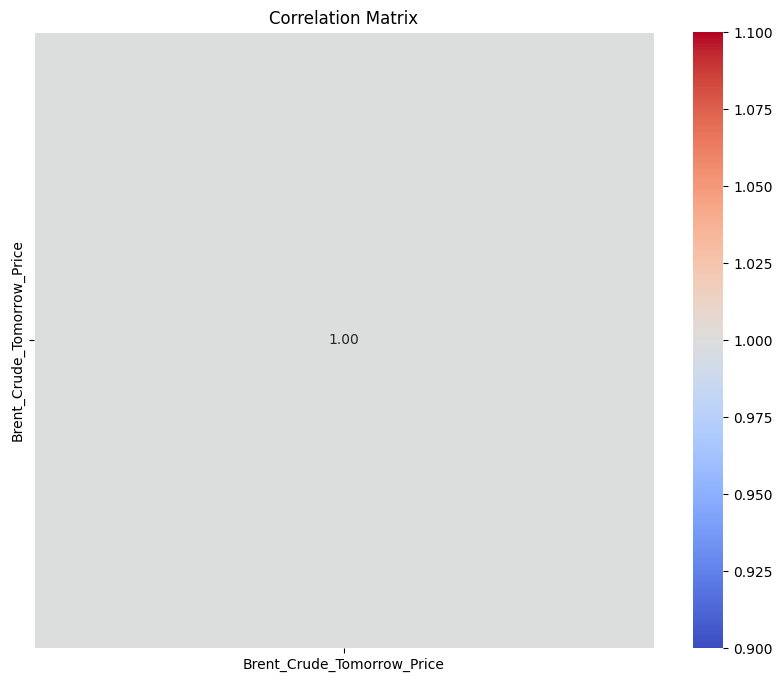

In [63]:
# Convert 'Date' column to datetime (if not already done)
df['Date'] = pd.to_datetime(df['Date'])

# Drop non-numeric columns (such as 'Date')
df_numeric = df.select_dtypes(include=[np.number])




In [64]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                                               Date  \
Date                                       1.000000   
ExxonMobil Corporation_Close               0.671643   
Chevron Corporation_Close                  0.848846   
ConocoPhillips_Close                       0.816987   
Occidental Petroleum Corporation_Close    -0.083127   
BP p.l.c._Close                            0.559700   
Royal Dutch Shell_Close                    0.659852   
United States Oil Fund_Close              -0.566724   
Energy Select Sector SPDR Fund_Close       0.658563   
ProShares Ultra Bloomberg Crude Oil_Close -0.723021   
Natural Gas (Henry Hub)_Close              0.240415   
Brent Crude_Close                          0.650962   
Gold_Close                                 0.917007   
Silver_Close                               0.786165   
Brent_Crude_Price                          0.650962   
Brent_Crude_Tomorrow_Price                 0.650921   

                                           ExxonMobil Corporatio

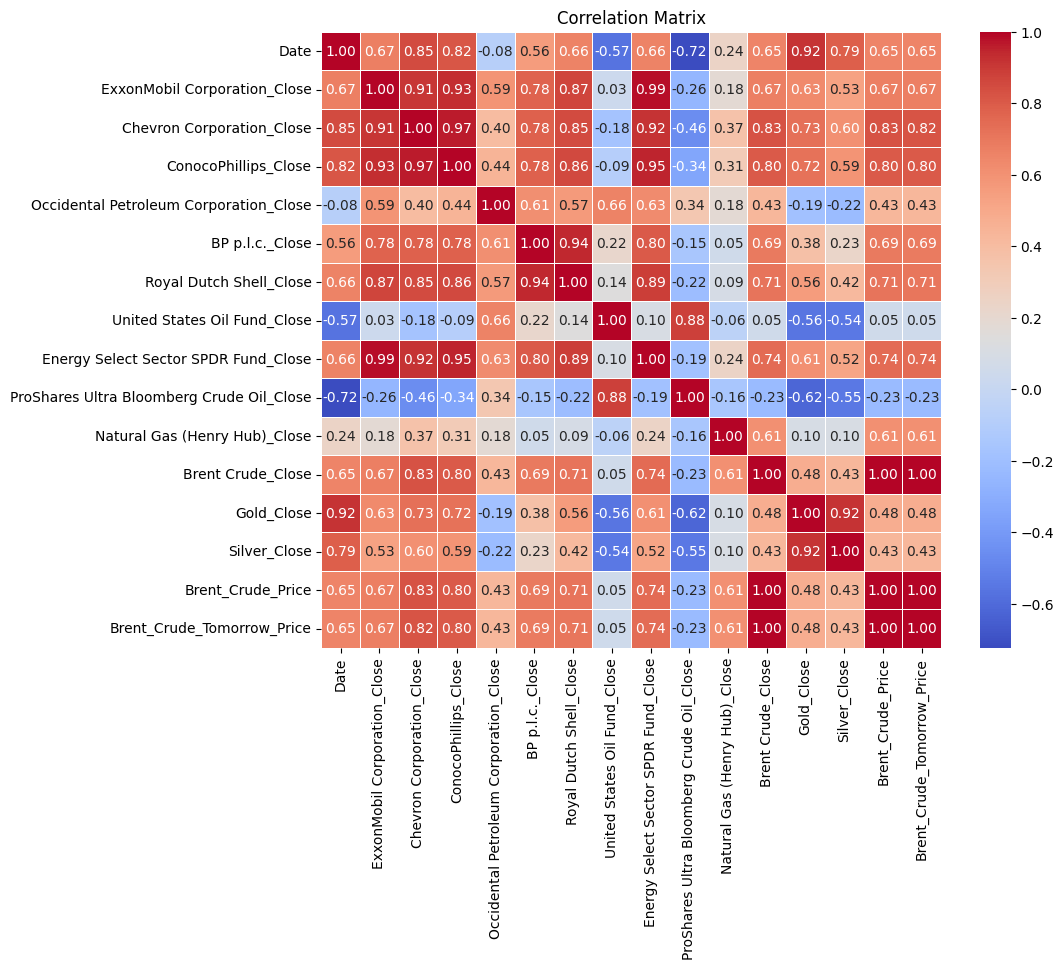

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


<Axes: xlabel='Date', ylabel='Brent_Crude_Price'>

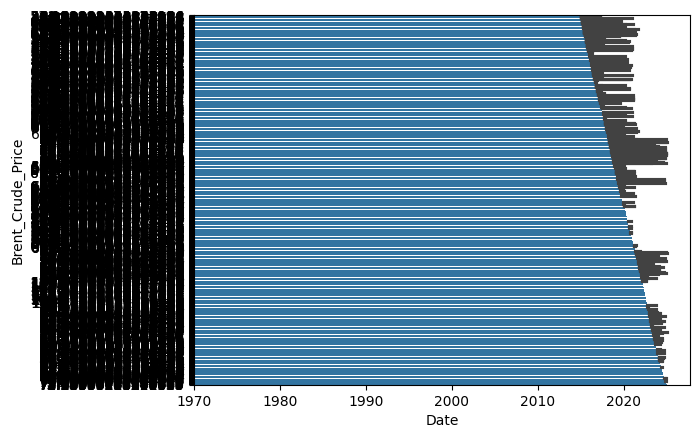

In [73]:
sns.barplot(x='Date',y='Brent_Crude_Price',data= df)

Root Mean Squared Error (RMSE): 2.27
R-squared: 0.84


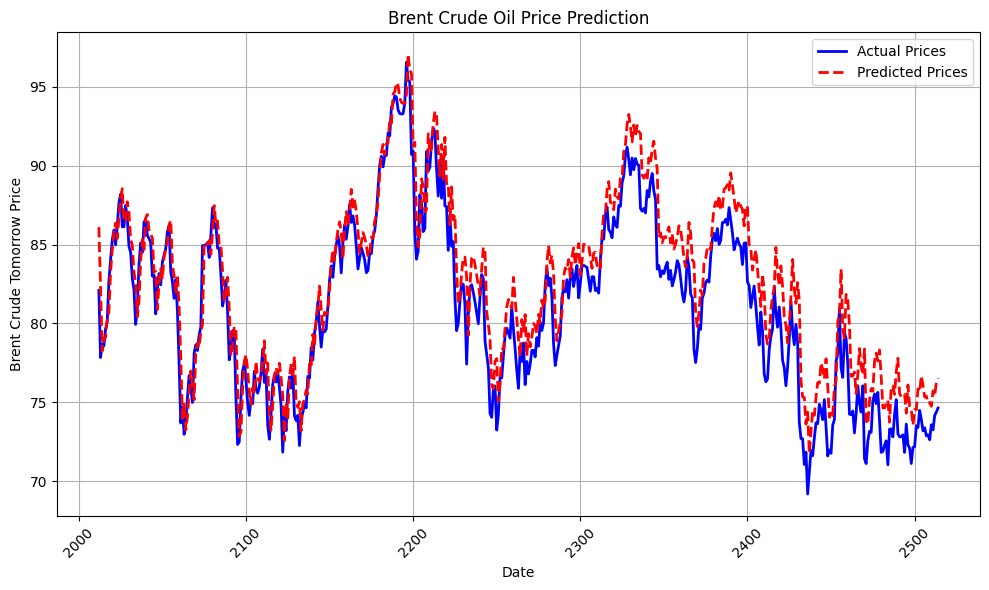

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df is already loaded and preprocessed

# Define the features (X) and target (y)
features = [
    'ExxonMobil Corporation_Close', 'Chevron Corporation_Close', 'ConocoPhillips_Close',
    'Occidental Petroleum Corporation_Close', 'BP p.l.c._Close', 'Royal Dutch Shell_Close',
    'United States Oil Fund_Close', 'Energy Select Sector SPDR Fund_Close',
    'ProShares Ultra Bloomberg Crude Oil_Close', 'Natural Gas (Henry Hub)_Close', 'Brent Crude_Close',
    'Gold_Close', 'Silver_Close', 'Brent_Crude_Price'
]

target = 'Brent_Crude_Tomorrow_Price'

# X contains the features and y contains the target variable
X = df[features]
y = df[target]

# Handle missing values by removing rows where either features or target values are missing
df_cleaned = df.dropna(subset=features + [target])

# Redefine X and y after dropping rows with NaN values
X_cleaned = df_cleaned[features]
y_cleaned = df_cleaned[target]

# Split the cleaned data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, shuffle=False)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate RMSE (Root Mean Squared Error) for model accuracy
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue', linewidth=2)
plt.plot(y_test.index, y_pred, label='Predicted Prices', color='red', linestyle='--', linewidth=2)
plt.title('Brent Crude Oil Price Prediction')
plt.xlabel('Date')
plt.ylabel('Brent Crude Tomorrow Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
import pickle

# Save the trained model to a pickle file
with open('brent_crude_price_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler as well to normalize the features in the future
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler have been saved successfully!")


Model and scaler have been saved successfully!


In [80]:
df.to_csv("Final_Processed_Data.csv", index=False)

In [81]:
df1 = pd.read_csv('Final_Processed_Data.csv')
df1.head()

,Date,ExxonMobil Corporation_Close,Chevron Corporation_Close,ConocoPhillips_Close,Occidental Petroleum Corporation_Close,BP p.l.c._Close,Royal Dutch Shell_Close,United States Oil Fund_Close,Energy Select Sector SPDR Fund_Close,ProShares Ultra Bloomberg Crude Oil_Close,Natural Gas (Henry Hub)_Close,Brent Crude_Close,Gold_Close,Silver_Close,Brent_Crude_Price,Brent_Crude_Tomorrow_Price
0,2015-01-05,58.399654,70.527756,47.582973,56.992779,20.030161,37.919918,150.320007,50.949234,557.500,2.882,53.110001,1203.900024,16.179001,53.110001,51.099998
1,2015-01-06,58.089184,70.495155,45.618462,56.508404,19.880352,37.456329,144.399994,50.200775,510.000,2.938,51.099998,1219.300049,16.603001,51.099998,51.150002
2,2015-01-07,58.677792,70.436401,45.922928,56.515755,19.930285,37.890209,146.960007,50.307678,524.375,2.871,51.150002,1210.599976,16.510000,51.150002,50.959999
3,2015-01-08,59.654449,72.048203,47.068272,57.014782,20.379711,38.656933,148.399994,51.437077,536.875,2.927,50.959999,1208.400024,16.351000,50.959999,50.110001
4,2015-01-09,59.570370,70.612587,47.061024,56.904690,20.296490,38.169575,146.240005,51.029430,522.500,2.946,50.110001,1216.000000,16.386000,50.110001,47.430000
